## Text Analysis - Stress Detection

Mental health problems such as stress, anxiety, and depression are prevalent among people. Social media platforms like Instagram and Reddit have become an outlet for people to share their feelings and seek help. In recent years, content creators have produced materials to help people deal with mental health issues. Organizations can use machine learning algorithms to detect signs of stress on social media platforms and offer help to those in need. This notebook will take you through the process of utilizing Machine Learning to detect patterns in text.

### Import Libraries & Data

In [9]:
import pandas as pd
import numpy as np

import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score, roc_curve, auc
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [28]:
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/stress.csv")
data.head()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1535935605,2,7.769821,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1516429555,0,2.667798,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1539809005,24,7.554238,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167


#### Check / Know your DATA.

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Columns: 116 entries, subreddit to sentiment
dtypes: float64(106), int64(6), object(4)
memory usage: 2.5+ MB


In [31]:
print(data.isnull().any())

subreddit                   False
post_id                     False
sentence_range              False
text                        False
id                          False
                            ...  
lex_dal_avg_pleasantness    False
social_upvote_ratio         False
social_num_comments         False
syntax_fk_grade             False
sentiment                   False
Length: 116, dtype: bool


### Clean & Visualization 

Our next step is to make our textual data in lower case, and rid of the stopwords, special symbols, links, and errors. A function so we can stem our text and then create a WordCloud. 

In [6]:
data['text'].head()

0    He said he had not felt that way before, sugge...
1    Hey there r/assistance, Not sure if this is th...
2    My mom then hit me with the newspaper and it s...
3    until i met my new boyfriend, he is amazing, h...
4    October is Domestic Violence Awareness Month a...
Name: text, dtype: object

In [7]:
%time
nltk.download('stopwords')
sentiment = SentimentIntensityAnalyzer()

ps = PorterStemmer()


stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text = " ".join(text)
    text = [ps.stem(word) for word in text.split(' ')]
    text = " ".join(text)

    return text


def plot(text):
    
    text = " ".join(i for i in data.text)
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
    
    
    plt.figure( figsize=(15,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    
    print(wordcloud.words_.keys())

Wall time: 0 ns


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hanna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


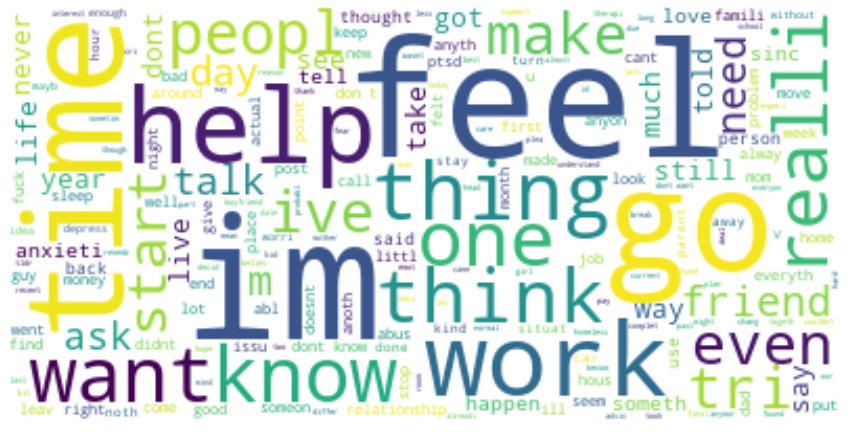

dict_keys(['im', 'feel', 'go', 'time', 'help', 'work', 'thing', 'one', 'know', 'want', 'think', 'realli', 'peopl', 'even', 'make', 'ive', 'tri', 'start', 'friend', 'm', 'need', 'talk', 'day', 'ask', 'year', 'much', 'got', 'still', 'live', 'life', 'take', 'see', 'say', 'never', 'told', 'way', 'dont', 'happen', 'love', 'tell', 'anxieti', 'sinc', 'someth', 'thought', 'use', 'back', 'person', 'said', 'relationship', 'come', 'job', 'lot', 'cant', 'good', 'well', 'famili', 'anyth', 'look', 'right', 'alway', 'move', 'seem', 'month', 'end', 'abus', 'first', 'someon', 'place', 'didnt', 'everyth', 'call', 'u', 'dont know', 'home', 'keep', 'went', 'around', 'mom', 'don t', 'hous', 'anyon', 'guy', 'post', 'made', 'put', 'leav', 'find', 'felt', 'sleep', 'money', 'point', 'v', 'bad', 'give', 'abl', 'stop', 'problem', 'new', 'issu', 'littl', 'week', 'anoth', 'actual', 'ptsd', 'fuck', 'doesnt', 'night', 'dad', 'ill', 'situat', 'parent', 'kind', 'noth', 'away', 'done', 'hour', 'turn', 'car', 'stay', 'e

In [8]:
data["text"] = data["text"].apply(clean)

plot(data['text'])



The labels are 0 for no stress and 1 for stress, let us label change the label so out model can predict using textual data.  

In [9]:
# data["label"] = data["label"].map({0: "No Stress", 1: "Stress"})
data = data[["text", "label"]]
print(data.head())

                                                text  label
0  said felt way sugget go rest trigger ahead you...      1
1  hey rassist sure right place post goe  im curr...      0
2  mom hit newspap shock would know dont like pla...      1
3  met new boyfriend amaz kind sweet good student...      1
4  octob domest violenc awar month domest violenc...      1


In [10]:
data['label'].value_counts(normalize=True)

1    0.524313
0    0.475687
Name: label, dtype: float64

After cleaning and stemming we see that common words like the, that, he and many others are not present. Now let us differentiate between our models. After we will convert our text into a vector using countvectorizer, then make the train and test split to check for our models.                 

### Vectorization & Model Eval.

In [10]:



def ModelEval(y_test,predictions):
    print("precision_score1:",precision_score(y_test, predictions) )
    print("recall_score1:",recall_score(y_test, predictions))
    print("f1_score1:",f1_score(y_test, predictions))
    print("roc_auc score",roc_auc_score(y_test, predictions) )
    print("")

    print("[Test Classification Report]") 
    print(classification_report(y_test, predictions))
    print("")
    
    #condusion metrics
    cm = confusion_matrix(y_test, predictions)
    score = np.mean([y_test == predictions])
    #plot
    sns.heatmap(cm, annot=True, fmt=".0f", linewidths=1, square = True,cbar = False);
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15);
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(predictions, y_test)
    roc_auc = auc(false_positive_rate, true_positive_rate)


    plt.figure(figsize=(10,10))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

##### Bernoulli Model

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

x = np.array(data["text"])
y = np.array(data["label"])

cv = CountVectorizer(ngram_range=(1, 3))
X = cv.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 30, random_state = 1000)
print(x_train.shape)
print(x_test.shape)

(2808, 193375)
(30, 193375)


In [12]:
from sklearn.naive_bayes import BernoulliNB
model1 = BernoulliNB()
model1.fit(x_train, y_train)

BernoulliNB()

precision_score1: 0.6956521739130435
recall_score1: 0.9411764705882353
f1_score1: 0.7999999999999999
roc_auc score 0.7013574660633484

[Test Classification Report]
              precision    recall  f1-score   support

           0       0.86      0.46      0.60        13
           1       0.70      0.94      0.80        17

    accuracy                           0.73        30
   macro avg       0.78      0.70      0.70        30
weighted avg       0.77      0.73      0.71        30




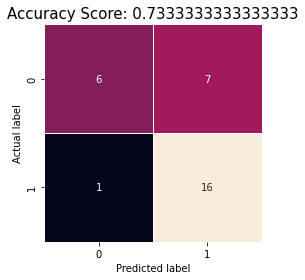

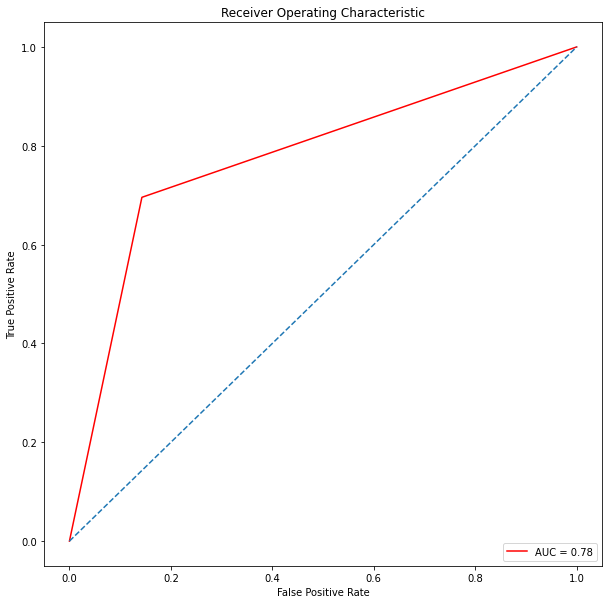

In [13]:
bern_predict = model1.predict(x_test)

ModelEval(y_test, bern_predict)

In [14]:
#  I'm constantly worried about the future and what might happen.

user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model1.predict(data)
sentence_sentiment_score = sentiment.polarity_scores(user)['compound'] 
print(output)
print("Your sentence compound sentiment score is: ", sentence_sentiment_score)

Enter a Text: 
[1]
Your sentence compound sentiment score is:  0.0


In [15]:
# My mind feels foggy and I'm having trouble concentrating.

user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model1.predict(data)
sentence_sentiment_score = sentiment.polarity_scores(user)['compound'] 
print(output)
print("Your sentence compound sentiment score is: ", sentence_sentiment_score)

Enter a Text: 
[1]
Your sentence compound sentiment score is:  0.0


In [16]:
# I just received some great news and I'm over the moon.

user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model1.predict(data)
sentence_sentiment_score = sentiment.polarity_scores(user)['compound'] 
print(output)
print("Your sentence compound sentiment score is: ", sentence_sentiment_score)

Enter a Text: 
[1]
Your sentence compound sentiment score is:  0.0


##### Multinomial Naive Bayes

In [17]:
from sklearn.naive_bayes import MultinomialNB

model2 = MultinomialNB()
model2.fit(x_train, y_train)

MultinomialNB()

precision_score1: 0.7
recall_score1: 0.8235294117647058
f1_score1: 0.7567567567567567
roc_auc score 0.6809954751131222

[Test Classification Report]
              precision    recall  f1-score   support

           0       0.70      0.54      0.61        13
           1       0.70      0.82      0.76        17

    accuracy                           0.70        30
   macro avg       0.70      0.68      0.68        30
weighted avg       0.70      0.70      0.69        30




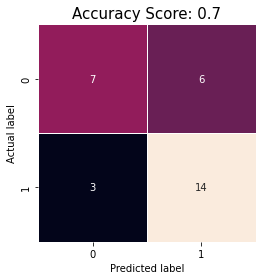

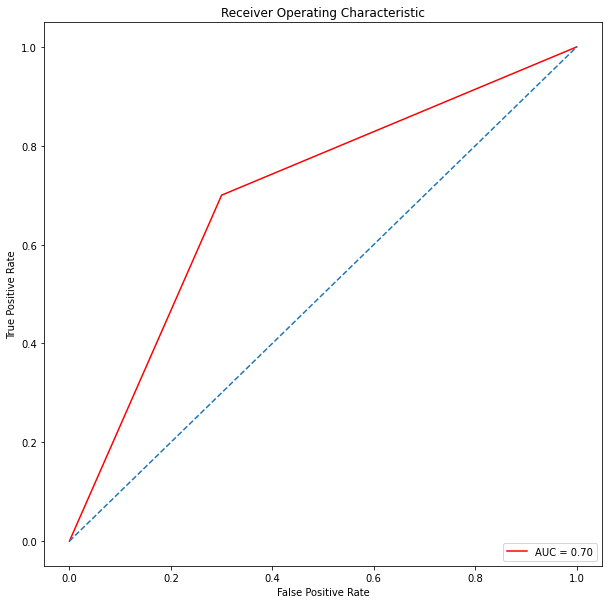

In [18]:
nb_predict = model2.predict(x_test)

ModelEval(y_test, nb_predict)

In [21]:

#  I'm constantly worried about the future and what might happen.

user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model2.predict(data)
sentence_sentiment_score = sentiment.polarity_scores(user)['compound'] 
print(output)
print("Your sentence compound sentiment score is: ", sentence_sentiment_score)

Enter a Text: I'm constantly worried about the future and what might happen.
[1]
Your sentence compound sentiment score is:  -0.296


In [20]:
# My mind feels foggy and I'm having trouble concentrating.

user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model2.predict(data)
sentence_sentiment_score = sentiment.polarity_scores(user)['compound'] 
print(output)
print("Your sentence compound sentiment score is: ", sentence_sentiment_score)

Enter a Text: My mind feels foggy and I'm having trouble concentrating.
[1]
Your sentence compound sentiment score is:  -0.4019


In [22]:
# I just received some great news and I'm over the moon.

user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model2.predict(data)
sentence_sentiment_score = sentiment.polarity_scores(user)['compound'] 
print(output)
print("Your sentence compound sentiment score is: ", sentence_sentiment_score)

Enter a Text:  just received some great news and I'm over the moon.
[0]
Your sentence compound sentiment score is:  0.6249


##### Random Forest (The Most Time Consuming...)

precision_score1: 0.7222222222222222
recall_score1: 0.7647058823529411
f1_score1: 0.7428571428571428
roc_auc score 0.6900452488687784

[Test Classification Report]
              precision    recall  f1-score   support

           0       0.67      0.62      0.64        13
           1       0.72      0.76      0.74        17

    accuracy                           0.70        30
   macro avg       0.69      0.69      0.69        30
weighted avg       0.70      0.70      0.70        30




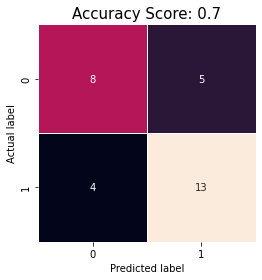

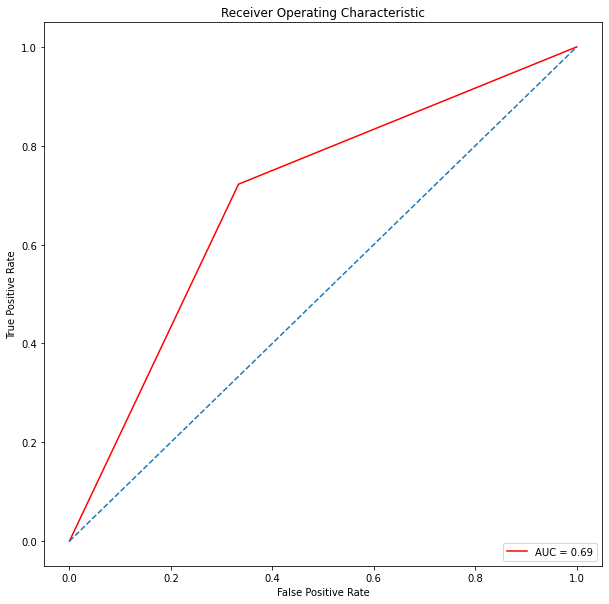

In [23]:
#########RandomForestClassifier
# Fitting classifier to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators =400,criterion="entropy",random_state =0)
classifier.fit(x_train,y_train)
# Predicting the Test set results
y_pred = classifier.predict(x_test)


ModelEval(y_test, y_pred)

In [24]:
#  I'm constantly worried about the future and what might happen.

user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = classifier.predict(data)
sentence_sentiment_score = sentiment.polarity_scores(user)['compound'] 
print(output)
print("Your sentence compound sentiment score is: ", sentence_sentiment_score)

Enter a Text: I'm constantly worried about the future and what might happen.
[0]
Your sentence compound sentiment score is:  -0.296


In [25]:
# My mind feels foggy and I'm having trouble concentrating.

user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = classifier.predict(data)
sentence_sentiment_score = sentiment.polarity_scores(user)['compound'] 
print(output)
print("Your sentence compound sentiment score is: ", sentence_sentiment_score)

Enter a Text: My mind feels foggy and I'm having trouble concentrating.
[0]
Your sentence compound sentiment score is:  -0.4019


In [26]:
# I just received some great news and I'm over the moon.

user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = classifier.predict(data)
sentence_sentiment_score = sentiment.polarity_scores(user)['compound'] 
print(output)
print("Your sentence compound sentiment score is: ", sentence_sentiment_score)

Enter a Text: I just received some great news and I'm over the moon.
[0]
Your sentence compound sentiment score is:  0.6249


In [27]:
data = {
    'Model': ['BernoulliNB', 'Naive Bayes', 'Random Forest Classifier'],
    '0: Precision': [0.75, 0.83, 0.9],
    '0: Recall':    [0.69, 0.77, 0.69],
    '1: Precision': [0.78, 0.83, 0.80],
    '1: Recall':    [0.82, 0.88, 0.94]}

df = pd.DataFrame(data)
df = df.sort_values(by=['0: Recall'], ascending = False)
df

,Model,0: Precision,0: Recall,1: Precision,1: Recall
1,Naive Bayes,0.83,0.77,0.83,0.88
0,BernoulliNB,0.75,0.69,0.78,0.82
2,Random Forest Classifier,0.90,0.69,0.80,0.94


Out of the 3 model, Naive Bayes gives us the best results, hence we found it gave the best result for our user responses.

### Summary & Conclusive Marks - What is this useful for.

To sum up, machine learning algorithms can be used to detect stress on social media platforms, and this project demonstrates how to train a machine learning model to detect stress in social media posts. The model produced good results, indicating the potential of using machine learning to detect signs of stress in social media posts.

This approach can be extended to other areas, such as sentiment analysis of customer reviews, detecting fake news or identifying spam emails. In essence, any problem that requires identifying patterns in text data can benefit from machine learning techniques like the one used in this project.